#  Speech Analytics

###  installing the libraries

In [20]:
import matplotlib.pyplot as plt

### How to play audio using python code

In [3]:
from playsound import playsound
import os

In [2]:
playsound('file.mp3')

In [25]:
os.system("file.mp3")

0

# Text to speech

### Using gTTS

Text-to-speech (TTS) technology reads the digital, it can take words from user and convert them into Audio.
There are many API's are available in Python in order to convert text to speech lets discuss some of them one by one 

gTTS API is the Google Text to Speech API <br>
'Features'<br>
Customizable speech-specific sentence tokenizer that allows for unlimited lengths of text to be read, all while keeping proper intonation, abbreviations, decimals and more;<br>
Customizable text pre-processors which can, for example, provide pronunciation corrections<br>
Documentation https://gtts.readthedocs.io/en/latest/module.html
<br>GTTS is an easy tool to convert text to voice, but it requires an internet connection to operate because it depends entirely on Google to get the audio data.

In [4]:
from gtts import gTTS,lang

In [5]:
tts = gTTS('Kalash Jindal')
tts.save('my.mp3')
playsound("my.mp3")

In [6]:
text_to_convert="Hello Kalash here Nice to meet you"

In [7]:
tts=gTTS(text = text_to_convert, lang ='en', slow = False)
tts.save('text_to_convert.mp3')
playsound('text_to_convert.mp3')

In [8]:
file = open("file.txt","r").read().replace("\n"," ")

In [9]:
file

'hey  kalash here  lets code '

In [10]:
tts=gTTS(text = file, lang ='en', slow = False)
tts.save('file.mp3')
playsound('file.mp3')

In [11]:
#Google Translate text-to-speech can speak in different local ‘accents’ just you have to use the language 

print(lang.tts_langs())

{'af': 'Afrikaans', 'ar': 'Arabic', 'bn': 'Bengali', 'bs': 'Bosnian', 'ca': 'Catalan', 'cs': 'Czech', 'cy': 'Welsh', 'da': 'Danish', 'de': 'German', 'el': 'Greek', 'en': 'English', 'eo': 'Esperanto', 'es': 'Spanish', 'et': 'Estonian', 'fi': 'Finnish', 'fr': 'French', 'gu': 'Gujarati', 'hi': 'Hindi', 'hr': 'Croatian', 'hu': 'Hungarian', 'hy': 'Armenian', 'id': 'Indonesian', 'is': 'Icelandic', 'it': 'Italian', 'ja': 'Japanese', 'jw': 'Javanese', 'km': 'Khmer', 'kn': 'Kannada', 'ko': 'Korean', 'la': 'Latin', 'lv': 'Latvian', 'mk': 'Macedonian', 'ml': 'Malayalam', 'mr': 'Marathi', 'my': 'Myanmar (Burmese)', 'ne': 'Nepali', 'nl': 'Dutch', 'no': 'Norwegian', 'pl': 'Polish', 'pt': 'Portuguese', 'ro': 'Romanian', 'ru': 'Russian', 'si': 'Sinhala', 'sk': 'Slovak', 'sq': 'Albanian', 'sr': 'Serbian', 'su': 'Sundanese', 'sv': 'Swedish', 'sw': 'Swahili', 'ta': 'Tamil', 'te': 'Telugu', 'th': 'Thai', 'tl': 'Filipino', 'tr': 'Turkish', 'uk': 'Ukrainian', 'ur': 'Urdu', 'vi': 'Vietnamese', 'zh-CN': 'Chin

###  Using pyttx3

In [12]:
import pyttsx3

In [13]:
engine = pyttsx3.init()

In [14]:
text = "I am a data scientist"
engine.say(text)


In [15]:
# play the speech
engine.runAndWait()

In [16]:
# get details of speaking rate
rate = engine.getProperty("rate")
print(rate)

200


In [17]:
engine.setProperty("rate", 300)
engine.say(text)
engine.runAndWait()

In [18]:
# slower
engine.setProperty("rate", 100)
engine.say(text)
engine.runAndWait()

In [19]:
voices = engine.getProperty("voices")
print(voices)

[<pyttsx3.voice.Voice object at 0x000001EB6584CC70>, <pyttsx3.voice.Voice object at 0x000001EB6584CC40>, <pyttsx3.voice.Voice object at 0x000001EB6584C100>]


In [20]:
engine.setProperty("voice", voices[0].id)
engine.say(text)
engine.runAndWait()

In [21]:
engine.save_to_file(text, "python.mp3")
engine.runAndWait()

##### Microsoft speech engine
If you use Microsoft Windows 10, it has a speech engine included.
Install the module win32com, then you can use this code:

In [22]:
import win32com.client as wincl
speak = wincl.Dispatch("SAPI.SpVoice")
speak.Speak("Hello World")

1

# Speech to text

In [23]:
import speech_recognition as sr

In [26]:
r = sr.Recognizer()

In [27]:
filename = "example.wav"

In [28]:
with sr.AudioFile(filename) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

is about which she had fixed a bug for country seed at a short distance from the city just that what is now called that state should the bonded with proofs of his ingenuity and smoke tax that require host to work some Dutch ovens reverse the meat was held fire caused the month before the horses weathercocks it turned against the wind another 100 ko drive it was established in confounded of beholder


In [29]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

In [30]:
path = "example.wav"
print("\nFull text:", get_large_audio_transcription(path))

audio-chunks\chunk1.wav : His about which she had fixed a bug for country seat. 
audio-chunks\chunk2.wav : Are short distance to the city. 
audio-chunks\chunk3.wav : Just that what is now called dutch street. 
audio-chunks\chunk4.wav : Should bounded with proofs of his ingenuity. 
audio-chunks\chunk5.wav : And smoke jack. 
audio-chunks\chunk6.wav : Required host version. 
audio-chunks\chunk7.wav : Church of windsor was to meet without fire. 
audio-chunks\chunk8.wav : Chords for the horses. 
audio-chunks\chunk9.wav : Weather cox it turned against the wind and other one headed could try with this. 
audio-chunks\chunk10.wav : Rustom stand confounded o b holders. 

Full text: His about which she had fixed a bug for country seat. Are short distance to the city. Just that what is now called dutch street. Should bounded with proofs of his ingenuity. And smoke jack. Required host version. Church of windsor was to meet without fire. Chords for the horses. Weather cox it turned against the wind 

#### Now let's use our microphone to convert our speech:

In [33]:
with sr.Microphone() as source:
    # read the audio data from the default microphone
    audio_data = r.record(source, duration=5)
    print("Recognizing...")
    # convert speech to text
    text = r.recognize_google(audio_data)
    print(text)

Recognizing...
how are you


In [34]:
text = r.recognize_google(audio_data, language="es-ES")

In [35]:
text

'how are you'

##### Python provides a module called PyDub to work with audio files. PyDub is a Python library to work with only .wav files.

Audio Processing tasks includes:<br>
Loading and Playing audio files<br>
Getting certain information of file length channels.<br>
Increasing/Decreasing volume & pitch<br>
Merging audio files<br>
Splitting an Audio file.<br>
Exporting files<br>
Adding some techniques & generating audio tunes<br>
All of these can be achieved using Pydub, a simple, well-designed Python module for audio manipulation. <br>

In [19]:
import urllib.request
from pydub import AudioSegment
from pydub.playback import play

### Let’s download our first audio using the below url:



In [20]:
urllib.request.urlretrieve("http://www.freemusicloops.co.uk/download.aspx?did=266", "firstfile.wav")

# Loading the Audio into Python's pydub package
audio1 = AudioSegment.from_wav("firstfile.wav")

play(audio1)

### Checking basic attributes of the Audio file
Check the data type

In [21]:
# data type fo the file
print(type(audio1))

<class 'pydub.audio_segment.AudioSegment'>


### Check the frame rate of the file

In [22]:
# To find frame rate of song/file
print(audio1.frame_rate)

44100


### To know about the channels of the file

In [23]:
# To know about channels of file
print(audio1.channels)

2


### Finding the number of bytes per sample

In [24]:
# Find the number of bytes per sample 
print(audio1.sample_width )

2


### Finding the maximum amplitude

In [25]:
# Find Maximum amplitude 
print(audio1.max)

32768


### To find the length of the audio file

In [26]:
# To know length of audio file
print(len(audio1))

7376


### To change the sample rate of an audio file

In [27]:
wav_file_new = audio1.set_frame_rate(22500) 
print(wav_file_new.frame_rate)

22500


### Increasing/Decreasing Volume
3

In [28]:
# Increase the volume by 10 dB 
new_wav_file = audio1 + 10

# Reducing volume by 5
silent_wav_file = audio1 - 5

# Playing silent file
play(silent_wav_file)

In [29]:
# Playing original file 
play(audio1)

In [30]:
# Playing louder file
play(new_wav_file)

### Merging multiple Audio files

In [31]:
# Download the first audio file from the url
urllib.request.urlretrieve("http://www.freemusicloops.co.uk/download.aspx?did=21", "secondfile.wav")

# Loading the Audio into Python's pydub package
audio2 = AudioSegment.from_wav("secondfile.wav")

play(audio2)

In [32]:
# Combine the two audio files 
audio3 = audio2 + audio1 + audio2 
# play the sound 
play(audio3)

### Exporting Audio files

In [39]:

audio1.export(out_f = "audio1.wav", format = "wav")
audio2.export(out_f = "audio2.wav", format = "wav")
audio3.export(out_f = "audio3.wav", format = "wav")


<_io.BufferedRandom name='audio3.wav'>

### Splitting Audio: split_to_mono() method

In [34]:
# Split stereo to mono 
b = audio3.split_to_mono() 
print(b) 
print(b[0].channels )

b[0].export(out_f="newaudio3.wav",format="wav")

[<pydub.audio_segment.AudioSegment object at 0x000001AA30430EE0>, <pydub.audio_segment.AudioSegment object at 0x000001AA304300A0>]
1


<_io.BufferedRandom name='newaudio3.wav'>

### Looping the Audio twice, fade in & fade out

In [35]:
# Looping the audio twice
audio1_loop = audio1 * 2
play(audio1_loop)

In [36]:
# Fetching the length of audio1_loop in milliseconds 
length_audio1 = len(audio1_loop) 

# Setting the fade time for audio 1 
audio_1_fadetime = int(length_audio1 * 0.5) 

# Adding fade in and fade out transitions to audio 1 
audio1_final = audio1.fade_in(audio_1_fadetime).fade_out(audio_1_fadetime) 
play(audio1_final)

### Mixing Audio & generating

In [37]:
# Mixing both the audios together
mixed_audio = audio2[:1000].overlay(audio1_final)

#Alternative way to merge and apply filters

# Filtering the audio2's beat at 3KHz
filtered_audio2 = audio2.low_pass_filter(3000)

# Mixing audio1 with audio2 on a reversed, panned version
loop = audio1_loop.reverse().pan(-0.5).overlay(audio1_loop.pan(0.5))

# Mix our filtered beat with the new loop at -3dB
final_audio = filtered_audio2.overlay(audio1_loop - 3, loop=True)

# Looping the audio twice
final_audio = final_audio * 2
#Code to download the final audio
final_audio .export(out_f = "final.wav", format = "wav")

play(final_audio )

### saving the audio files

In [1]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 22500  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)

In [4]:
playsound("output.wav")

In [16]:
import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "hello_how_are_you.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


In [17]:
playsound("hello_how_are_you.wav")

In [10]:
import wave

# Create audio file wave object
hello_how_are_you = wave.open("hello_how_are_you.wav", 'r')

# Read all frames from wave object 
signal_hhay = hello_how_are_you.readframes(-1)

# View first 10
print(signal_hhay[:10])


b'\x00\x00\x00\x00\xff\xff\x00\x00\x00\x00'


In [11]:
import numpy as np

In [12]:
# Convert hello how are you audio bytes to integers
soundwave_hhay = np.frombuffer(signal_gm, dtype="int16")

# View the first 10 sound wave values
print(soundwave_hhay[:10])


[ 0  0 -1  0  0  0  0 -1  0  0]


In [14]:
# Get the sound wave frame rate
framerate_hhay = hello_how_are_you.getframerate()


In [15]:
# Find the sound wave timestamps
time_hhay = np.linspace(start=0,stop=len(soundwave_hhay)/framerate_hhay,num=len(soundwave_hhay))

# Print the first 10 timestamps
print(time_hhay[:10])


[0.00000000e+00 2.26758228e-05 4.53516456e-05 6.80274684e-05
 9.07032912e-05 1.13379114e-04 1.36054937e-04 1.58730760e-04
 1.81406582e-04 2.04082405e-04]


In [23]:
hello_whats_up = wave.open("hello_whats_up.wav", 'r')
signal_hwu = hello_whats_up.readframes(-1)
soundwave_hwu = np.frombuffer(signal_hwu, dtype="int16")
framerate_hwu = hello_whats_up.getframerate()
time_hwu = np.linspace(start=0,stop=len(soundwave_hwu)/framerate_hwu,num=len(soundwave_hwu))


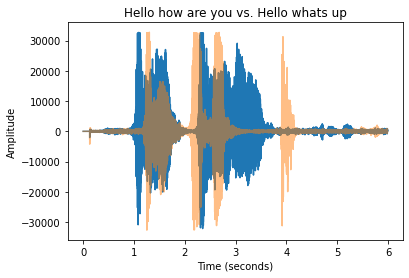

In [25]:
plt.title('Hello how are you vs. Hello whats up')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.plot(time_hhay, soundwave_hhay, label='Hello how are you')

# Add the Good Morning data to the plot
plt.plot(time_hwu, soundwave_hwu, label='Hello whats up',alpha=0.5)
   # Set the alpha variable to 0.5
